In [134]:
%matplotlib inline

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import mpl_toolkits.axisartist.floating_axes as floating_axes

from astropy.io import ascii
from astropy import constants as const
from astropy.table import Table
from scipy.integrate import quad

In [175]:
#read in original DR7 data
file_name = 'dr7Data.dat'
table = Table.read(file_name, format='ascii.commented_header', 
                  include_names=['ra', 'dec', 'redshift', 'Rgal'])
ra1, dec1, red1, rgal1 = table['ra'], table['dec'], table['redshift'], table['Rgal']


#read in downsampled DR7 data
file_name = 'downsampled.dat'
table = Table.read(file_name, format='ascii.commented_header', 
                  include_names=['ra', 'dec', 'redshift', 'Rgal'])
ra2, dec2, red2, rgal2 = table['ra'], table['dec'], table['redshift'], table['Rgal']

#read in voids output from original DR7 data
file_name = 'dr7Data_comoving_maximal_edge_length_5.txt'
table = Table.read(file_name, format='ascii.commented_header')
radius3, flag3, r3, ra3, dec3 = table['radius'], table['flag'], table['r'], table['ra'], table['dec']

#read in voids output from downsampled DR7 data
file_name = 'kias1033_5_LOWZ_comoving_maximal.txt'
table = Table.read(file_name, format='ascii.commented_header', 
                  include_names=['radius', 'flag', 'r', 'ra', 'dec'])
radius4, flag4, r4, ra4, dec4 = table['radius'], table['flag'], table['r'], table['ra'], table['dec']


In [171]:
#constants

#degree to radian scale factor
dtr = np.pi / 180

#c value in km/s
c = const.c.to('km/s').value

In [172]:
#conversions
phi1 = ra1 * dtr
phi2= ra2 * dtr
phi3 = ra3 * dtr
phi4 = ra4 * dtr

'''
# converting redshift z to distance r, takes some time
def Distance(z,omega_m,h):
    dist = np.ones(len(z))
    H0 = 100*h
    for i,redshift in enumerate(z):
        a_start = 1/(1+redshift)
        I = quad(f,a_start,1,args=omega_m)
        dist[i] = I[0]*(c/H0)
    return dist
def f(a,omega_m):
    return 1/(np.sqrt(a*omega_m*(1+((1-omega_m)*a**3/omega_m))))
r1 = Distance(red1,0.3,1)
r2 = Distance(red2,0.3,1)
print(r1)
print(r2)
'''

'\n# converting redshift z to distance r, takes some time\ndef Distance(z,omega_m,h):\n    dist = np.ones(len(z))\n    H0 = 100*h\n    for i,redshift in enumerate(z):\n        a_start = 1/(1+redshift)\n        I = quad(f,a_start,1,args=omega_m)\n        dist[i] = I[0]*(c/H0)\n    return dist\ndef f(a,omega_m):\n    return 1/(np.sqrt(a*omega_m*(1+((1-omega_m)*a**3/omega_m))))\nr1 = Distance(red1,0.3,1)\nr2 = Distance(red2,0.3,1)\nprint(r1)\nprint(r2)\n'

In [168]:
#limits

ra_min1, ra_max1 = np.min(phi1)-(0.5*np.pi), np.max(phi1)-(0.5*np.pi)
ra_min2, ra_max2 = np.min(phi2)-(0.5*np.pi), np.max(phi2)-(0.5*np.pi)
#ra0, ra1 = .5, 3.0
print(ra_min1/dtr, ra_max1/dtr)
#print(ra_min2/dtr, ra_max2/dtr)
r_min, r_max1 = 0., np.max(rgal1)
r_min, r_max2 = 0., np.max(rgal2)
#r_max = np.max(r_max1, r_max2)
print(r_min, r_max1)
#print(cz_min, cz_max2)

-89.99827699999999 269.997406
0.0 1333.67


In [173]:
#function to set up axes
def setup_axes3(fig, rect, ra0, ra1, cz0, cz1):
    """Produce a polar "wedge plot" for a slice of the catalog.
    
    :param fig: `pyplot.figure` object.
    :param rect: multi-axis coordinate, e.g., 111, 22[1-4], etc.
    :param ra0: minimum RA.
    :param ra0: maximum RA.
    :param cz0: minimal radial coordinate (e.g., v=cz).
    :param cz1: maximal radial coordinate (e.g., v=cz).
    """
    tr = mpl.projections.PolarAxes.PolarTransform() 
    grid_helper = floating_axes.GridHelperCurveLinear(tr, extremes=(ra0, ra1, cz0, cz1))

    ax1 = floating_axes.FloatingSubplot(fig, rect, grid_helper=grid_helper)
    fig.add_subplot(ax1)

    # adjust axis
    ax1.axis['left'].set_axis_direction('bottom')
    ax1.axis['right'].set_axis_direction('top')
    ax1.axis['bottom'].set_visible(False)
    ax1.axis['top'].set_axis_direction("bottom")
    ax1.axis['top'].toggle(ticklabels=True, label=True)
    ax1.axis['top'].major_ticklabels.set_axis_direction("top")
    ax1.axis['top'].label.set_axis_direction("top")
    ax1.axis['left'].label.set_text(r'$z$ [km s$^{-1}$]')
    ax1.axis['left'].major_ticklabels.set_axis_direction('right')
    ax1.axis["top"].label.set_text(r'$\alpha-90^\circ$')

    # create a parasite axes whose transData in RA, cz
    aux_ax = ax1.get_aux_axes(tr)

    aux_ax.patch = ax1.patch  
    ax1.patch.zorder = 0.9  

    return ax1, aux_ax

3 665 2.2461836090131917 4.150940908849822
-1.7575208669415192 11.434145525988798 10.130258184525772 17.55895532205338
0 740 2.3281302000732014 4.167918909661246
-1.825816855566152 28.9565650086192 10.013243608998836 57.18084460030702
 
11 691 2.1059563176067333 4.277033091625638
5.152211106485218 32.97879875533266 10.039630406353018 16.047579680299293
0 741 2.1250429371724895 4.305218583449578
5.738008658062872 28.9565650086192 10.005122212892555 57.18084460030702
 
2 692 2.055290446468386 4.461900992601019
7.427413775240349 35.607102980667584 10.030753106012241 17.619409482078172
0 742 2.0482753671322644 4.458812226948896
15.365764943853685 28.9565650086192 10.004140271046001 57.18084460030702
 
0 697 2.025380419206041 4.500122610541166
11.434145525988798 39.386789807623174 10.004927700212487 18.45885512307419
0 721 2.035125799115439 4.524994492754268
18.697335028881817 37.106167380579684 10.09440199932447 57.18084460030702
 
1 696 2.0624758497704105 4.413698982033515
32.978798755332

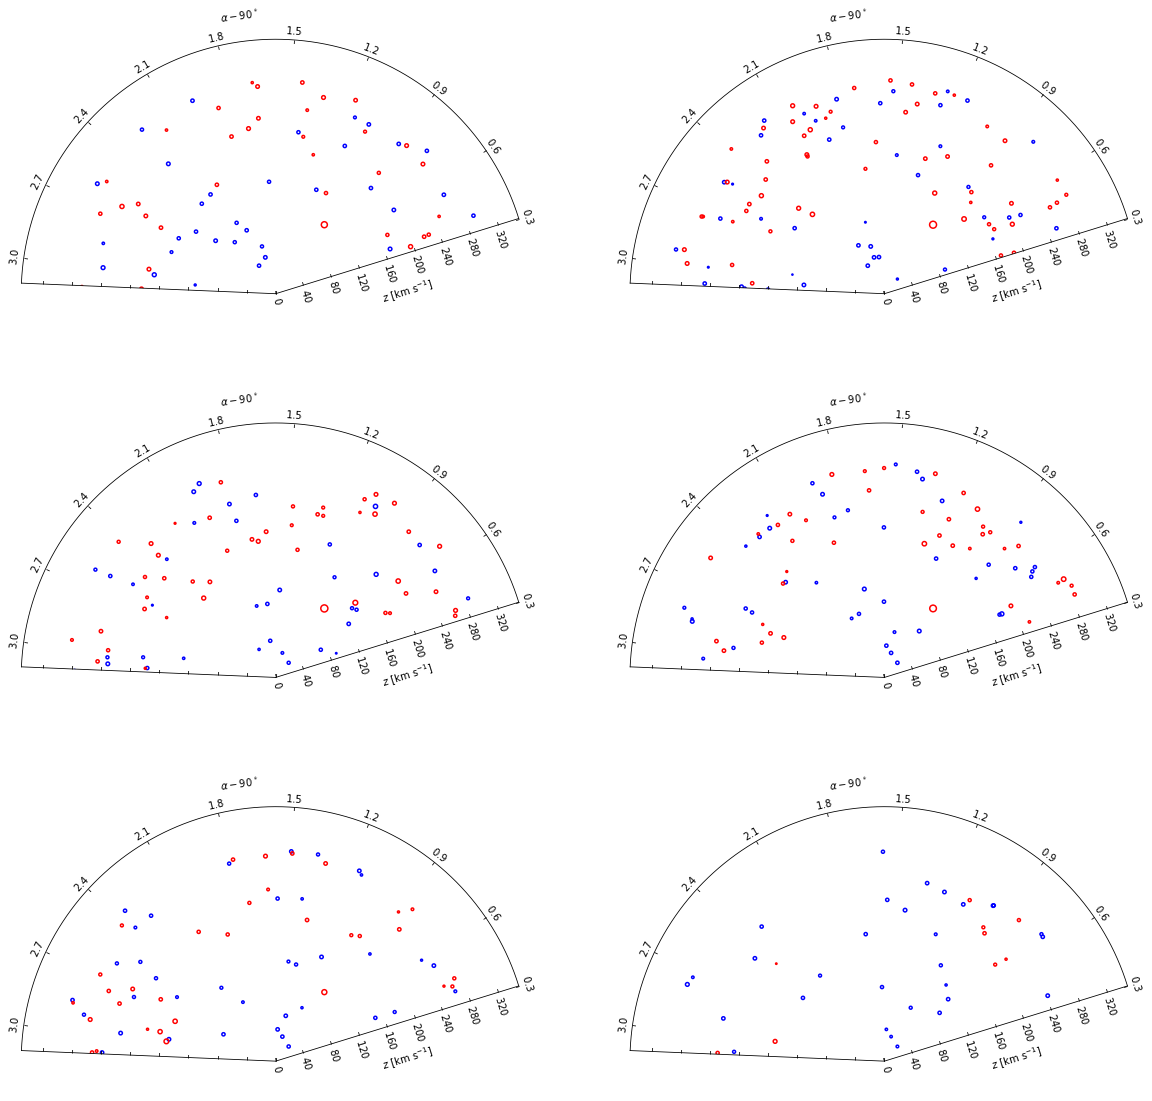

In [184]:
fig = plt.figure(figsize=(20,20))

ra_min, ra_max = .3, 3.1

i,d,t = 0, 0.0, 2.0

for i, d in enumerate([0., 10., 20., 30., 40., 50.]):
    slice_ = d + t/2


    cut1 = np.logical_and(dec1 > d, dec1 <= d+t)
    this_ra01, this_ra11 = np.min(phi1[cut1])-0.5*np.pi, np.max(phi1[cut1])-0.5*np.pi

    cut2 = np.logical_and(dec2 > d, dec2 <= d+t)
    this_ra02, this_ra12 = np.min(phi2[cut2])-0.5*np.pi, np.max(phi2[cut2])-0.5*np.pi

    cut3 = np.sin(np.abs(slice_ - dec3)*np.pi/180)*r3 <= radius3
    r_sect3 = np.sqrt(radius3[cut3]**2 - (np.sin(np.abs(slice_ - dec3[cut3])*np.pi/180)*r3[cut3])**2)
    print(np.min(flag3[cut3]), np.max(flag3[cut3]), np.min(phi3[cut3]), np.max(phi3[cut3]))
    print(np.min(dec3[cut3]), np.max(dec3[cut3]), np.min(radius3[cut3]), np.max(radius3[cut3]))

    cut4 = np.sin(np.abs(slice_ - dec4)*np.pi/180)*r4 <= radius4
    r_sect4 = np.sqrt(radius4[cut4]**2 - (np.sin(np.abs(slice_ - dec4[cut4])*np.pi/180)*r4[cut4])**2)
    print(np.min(flag4[cut4]), np.max(flag4[cut4]), np.min(phi4[cut4]), np.max(phi4[cut4]))
    print(np.min(dec4[cut4]), np.max(dec4[cut4]), np.min(radius4[cut4]), np.max(radius4[cut4]))


    rect = 320 + (i+1)
    ax, aux_ax = setup_axes3(fig, rect, ra_min, ra_max, 0, 350)
    #aux_ax.scatter(phi1[cut1]-(0.5*np.pi), rgal1[cut1], color='c', marker='.', alpha=0.5)
    #aux_ax.scatter(phi2[cut2]-(0.5*np.pi), rgal2[cut2], color='r', marker='.', alpha=0.5)
    aux_ax.scatter(ra3[cut3], r3[cut3], edgecolors='b', 
                   s=r_sect3, facecolors='none', 
                   linewidth=1.5)
    aux_ax.scatter(ra4[cut4], r4[cut4], edgecolors='r', 
                   s=r_sect4, facecolors='none', 
                   linewidth=1.5)


    #aux_ax.plot([this_ra0, this_ra1], [cz_min1, cz_max1], color='k', ls=':')
    #aux_ax.plot([this_ra1, this_ra0], [cz_min1, cz_max1], color='k', ls=':')
    #ax.text(18000,32000, r'$\delta={:.1f}^\circ$'.format(d), fontsize=18)
    #print(i,d)
    print(' ')


#fig.tight_layout()